# Q2

**Consider only the below columns and prepare a prediction model for predicting Price.**

**Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]**

 

**Model -- model of the car**

**Price  -- Offer Price in EUROs**

**Age_08_04 -- Age in months as in August 2004**

**Mfg_Month -- Manufacturing month (1-12)**

**Mfg_Year	-- Manufacturing Year**

**KM -- Accumulated Kilometers on odometer**

**Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)**

**HP -- Horse Power**

**Met_Color	 -- Metallic Color?  (Yes=1, No=0)**

**Color -- Color (Blue, Red, Grey, Silver, Black, etc.)**

**Automatic	-- Automatic ( (Yes=1, No=0)**

**cc -- Cylinder Volume in cubic centimeters**

**Doors -- Number of doors**

**Cylinders	-- Number of cylinders**

**Gears -- Number of gear positions**

**Quarterly_Tax -- Quarterly road tax in EUROs**

**Weight -- Weight in Kilograms**

**Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)**

**BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)**

**Guarantee_Period -- 	Guarantee period in months**

**ABS -- Anti-Lock Brake System (Yes=1, No=0)**

**Airbag_1 -- Driver_Airbag  (Yes=1, No=0)**

**Airbag_2 -- Passenger Airbag  (Yes=1, No=0)**

**Airco -- Airconditioning  (Yes=1, No=0)**

**Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)**

**Boardcomputer -- Boardcomputer  (Yes=1, No=0)**

**CD_Player -- CD Player  (Yes=1, No=0)**

**Central_Lock -- Central Lock  (Yes=1, No=0)**

**Powered_Windows -- Powered Windows  (Yes=1, No=0)**

**Power_Steering -- Power Steering  (Yes=1, No=0)**

**Radio -- Radio  (Yes=1, No=0)**

**Mistlamps	-- Mistlamps  (Yes=1, No=0)**

**Sport_Model -- Sport Model  (Yes=1, No=0)**

**Backseat_Divider -- Backseat Divider  (Yes=1, No=0)**

**Metallic_Rim --Metallic Rim  (Yes=1, No=0)**

**Radio_cassette -- Radio Cassette  (Yes=1, No=0)**

**Tow_Bar -- Tow Bar  (Yes=1, No=0)**

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [2]:
toyota= pd.read_excel('ToyotaCorolla (1).xlsx')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## PERFORMING EXPLORATORY DATA ANALYSIS

In [3]:
# Using only required columns
data=pd.DataFrame(toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]])
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
#changing columns
df=data.rename({'Price':'pr','Age_08_04':'age','KM':'km','HP':'hp','cc':'cc','Doors':'dr',
                'Gears':'gr','Quarterly_Tax':'qt','Weight':'wt'},axis=1)
df=df.copy()

In [5]:
#Viewing no. of rows and columns in the data
df.shape

(1436, 9)

In [6]:
#Viewing the overall basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pr      1436 non-null   int64
 1   age     1436 non-null   int64
 2   km      1436 non-null   int64
 3   hp      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   dr      1436 non-null   int64
 6   gr      1436 non-null   int64
 7   qt      1436 non-null   int64
 8   wt      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
#Checking for null values in the data
df.isnull().sum()

pr     0
age    0
km     0
hp     0
cc     0
dr     0
gr     0
qt     0
wt     0
dtype: int64

In [8]:
#Checking for duplicated values in the data
df[df.duplicated()]

,pr,age,km,hp,cc,dr,gr,qt,wt
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
df.duplicated().sum()

1

In [10]:
#Handling duplicate data
df=df.drop_duplicates(keep='first').reset_index()

In [11]:
df

,index,pr,age,km,hp,cc,dr,gr,qt,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
#remove the column that contains previous index values
df=df.drop(columns='index')
df

,pr,age,km,hp,cc,dr,gr,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [13]:
data.shape # initial shape of data

(1436, 9)

In [14]:
df.shape #shape of data after removing duplicate values

(1435, 9)

In [15]:
#checking for data that has 0 as values in each column
print('No. of observations with "0" as value in  Price column: ',(df['pr']==0).sum(),'\n')
print('No. of observations with "0" as value in  Age_08_04 column: ',(df['age']==0).sum(),'\n')
print('No. of observations with "0" as value in  KM column: ',(df['km']==0).sum(),'\n')
print('No. of observations with "0" as value in  HP column: ',(df['hp']==0).sum(),'\n')
print('No. of observations with "0" as value in  cc column: ',(df['cc']==0).sum(),'\n')
print('No. of observations with "0" as value in  Doors column: ',(df['dr']==0).sum(),'\n')
print('No. of observations with "0" as value in  Gears column: ',(df['gr']==0).sum(),'\n')
print('No. of observations with "0" as value in  Quarterly_Tax column: ',(df['qt']==0).sum(),'\n')
print('No. of observations with "0" as value in  Weight column: ',(df['wt']==0).sum())

No. of observations with "0" as value in  Price column:  0 

No. of observations with "0" as value in  Age_08_04 column:  0 

No. of observations with "0" as value in  KM column:  0 

No. of observations with "0" as value in  HP column:  0 

No. of observations with "0" as value in  cc column:  0 

No. of observations with "0" as value in  Doors column:  0 

No. of observations with "0" as value in  Gears column:  0 

No. of observations with "0" as value in  Quarterly_Tax column:  0 

No. of observations with "0" as value in  Weight column:  0


## GETTING STATISTICAL INFORMATION OF DATA

In [16]:
df.describe()

,pr,age,km,hp,cc,dr,gr,qt,wt
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [17]:
#correlation values
df.corr()

,pr,age,km,hp,cc,dr,gr,qt,wt
pr,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
dr,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gr,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
qt,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


## VISUALIZATION

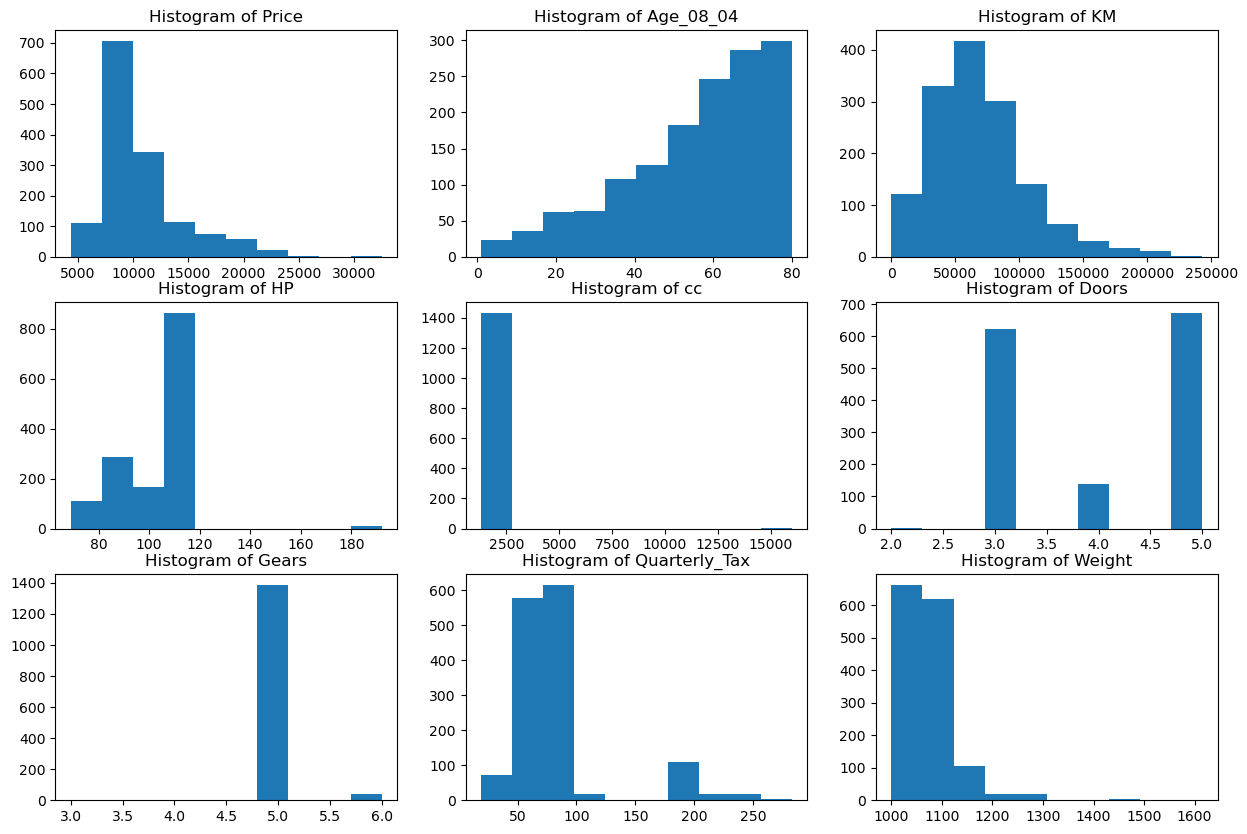

In [18]:
#Histograms
plt.figure(figsize=(15,10))
plt.subplot(331)
plt.title('Histogram of Price')
plt.hist(df['pr'])
plt.subplot(332)
plt.title('Histogram of Age_08_04')
plt.hist(df['age'])
plt.subplot(333)
plt.title('Histogram of KM')
plt.hist(df['km'])
plt.subplot(334)
plt.title('Histogram of HP')
plt.hist(df['hp'])
plt.subplot(335)
plt.title('Histogram of cc')
plt.hist(df['cc'])
plt.subplot(336)
plt.title('Histogram of Doors')
plt.hist(df['dr'])
plt.subplot(337)
plt.title('Histogram of Gears')
plt.hist(df['gr'])
plt.subplot(338)
plt.title('Histogram of Quarterly_Tax')
plt.hist(df['qt'])
plt.subplot(339)
plt.title('Histogram of Weight')
plt.hist(df['wt'])
plt.show()

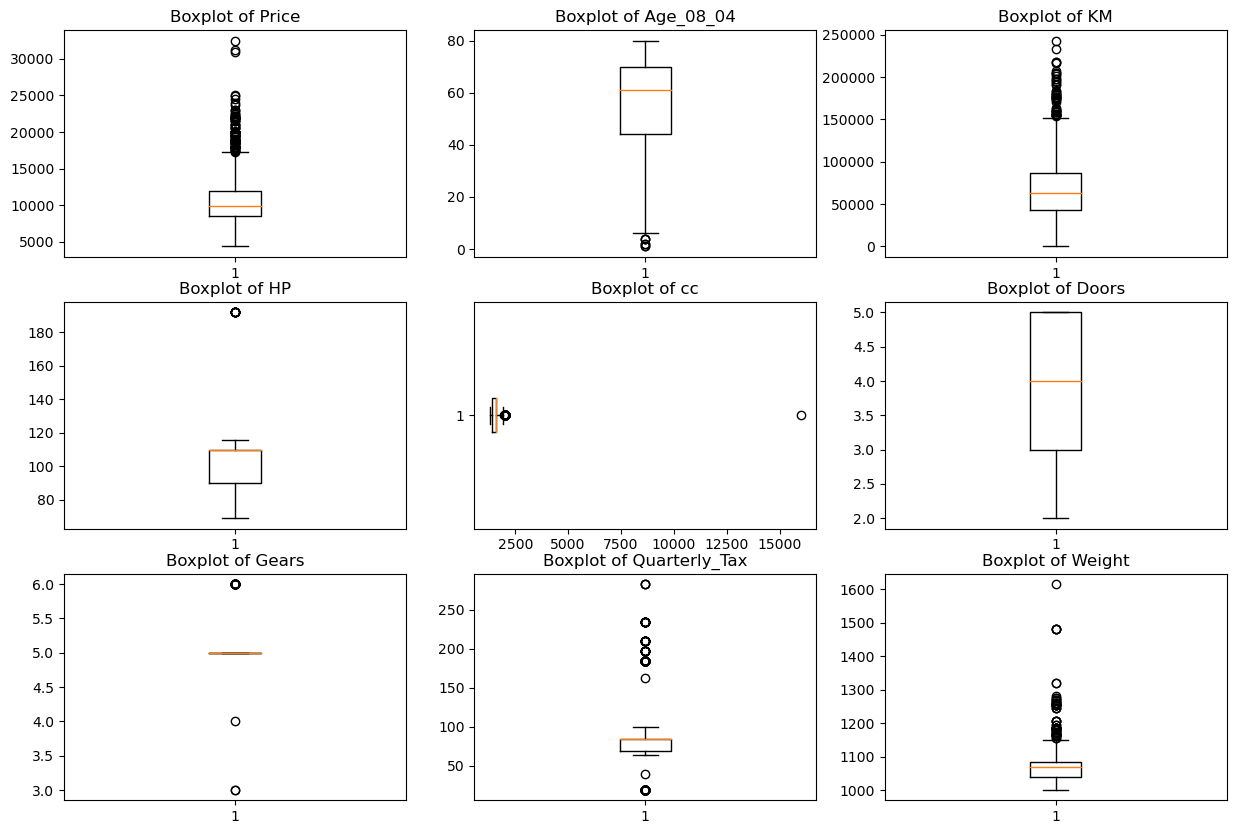

In [19]:
#Boxplot
plt.figure(figsize=(15,10))
plt.subplot(331)
plt.title('Boxplot of Price')
plt.boxplot(df['pr'])
plt.subplot(332)
plt.title('Boxplot of Age_08_04')
plt.boxplot(df['age'])
plt.subplot(333)
plt.title('Boxplot of KM')
plt.boxplot(df['km'])
plt.subplot(334)
plt.title('Boxplot of HP')
plt.boxplot(df['hp'])
plt.subplot(335)
plt.title('Boxplot of cc')
plt.boxplot(df['cc'],vert=False)
plt.subplot(336)
plt.title('Boxplot of Doors')
plt.boxplot(df['dr'])
plt.subplot(337)
plt.title('Boxplot of Gears')
plt.boxplot(df['gr'])
plt.subplot(338)
plt.title('Boxplot of Quarterly_Tax')
plt.boxplot(df['qt'])
plt.subplot(339)
plt.title('Boxplot of Weight')
plt.boxplot(df['wt'])
plt.show()

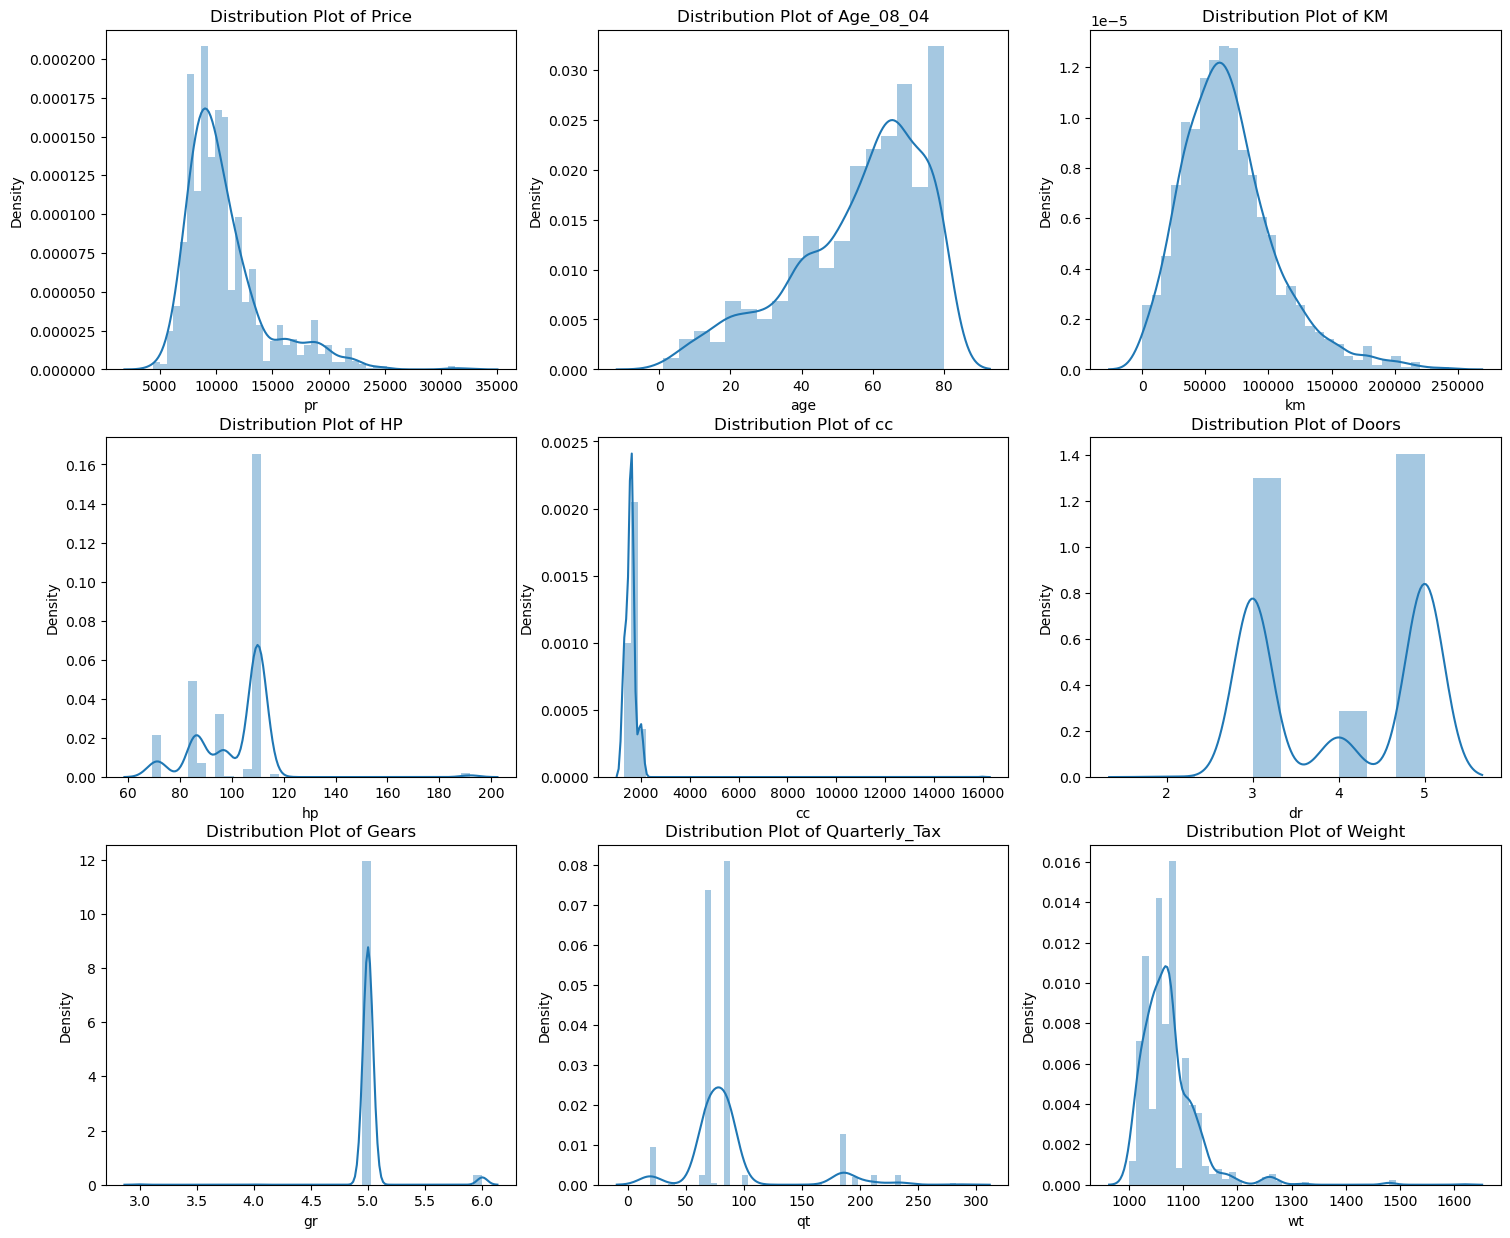

In [20]:
#Distribution plots
plt.figure(figsize=(18,15))
plt.subplot(331)
plt.title('Distribution Plot of Price')
sns.distplot(df['pr'])
plt.subplot(332)
plt.title('Distribution Plot of Age_08_04')
sns.distplot(df['age'])
plt.subplot(333)
plt.title('Distribution Plot of KM')
sns.distplot(df['km'])
plt.subplot(334)
plt.title('Distribution Plot of HP')
sns.distplot(df['hp'])
plt.subplot(335)
plt.title('Distribution Plot of cc')
sns.distplot(df['cc'])
plt.subplot(336)
plt.title('Distribution Plot of Doors')
sns.distplot(df['dr'])
plt.subplot(337)
plt.title('Distribution Plot of Gears')
sns.distplot(df['gr'])
plt.subplot(338)
plt.title('Distribution Plot of Quarterly_Tax')
sns.distplot(df['qt'])
plt.subplot(339)
plt.title('Distribution Plot of Weight')
sns.distplot(df['wt'])
plt.show()

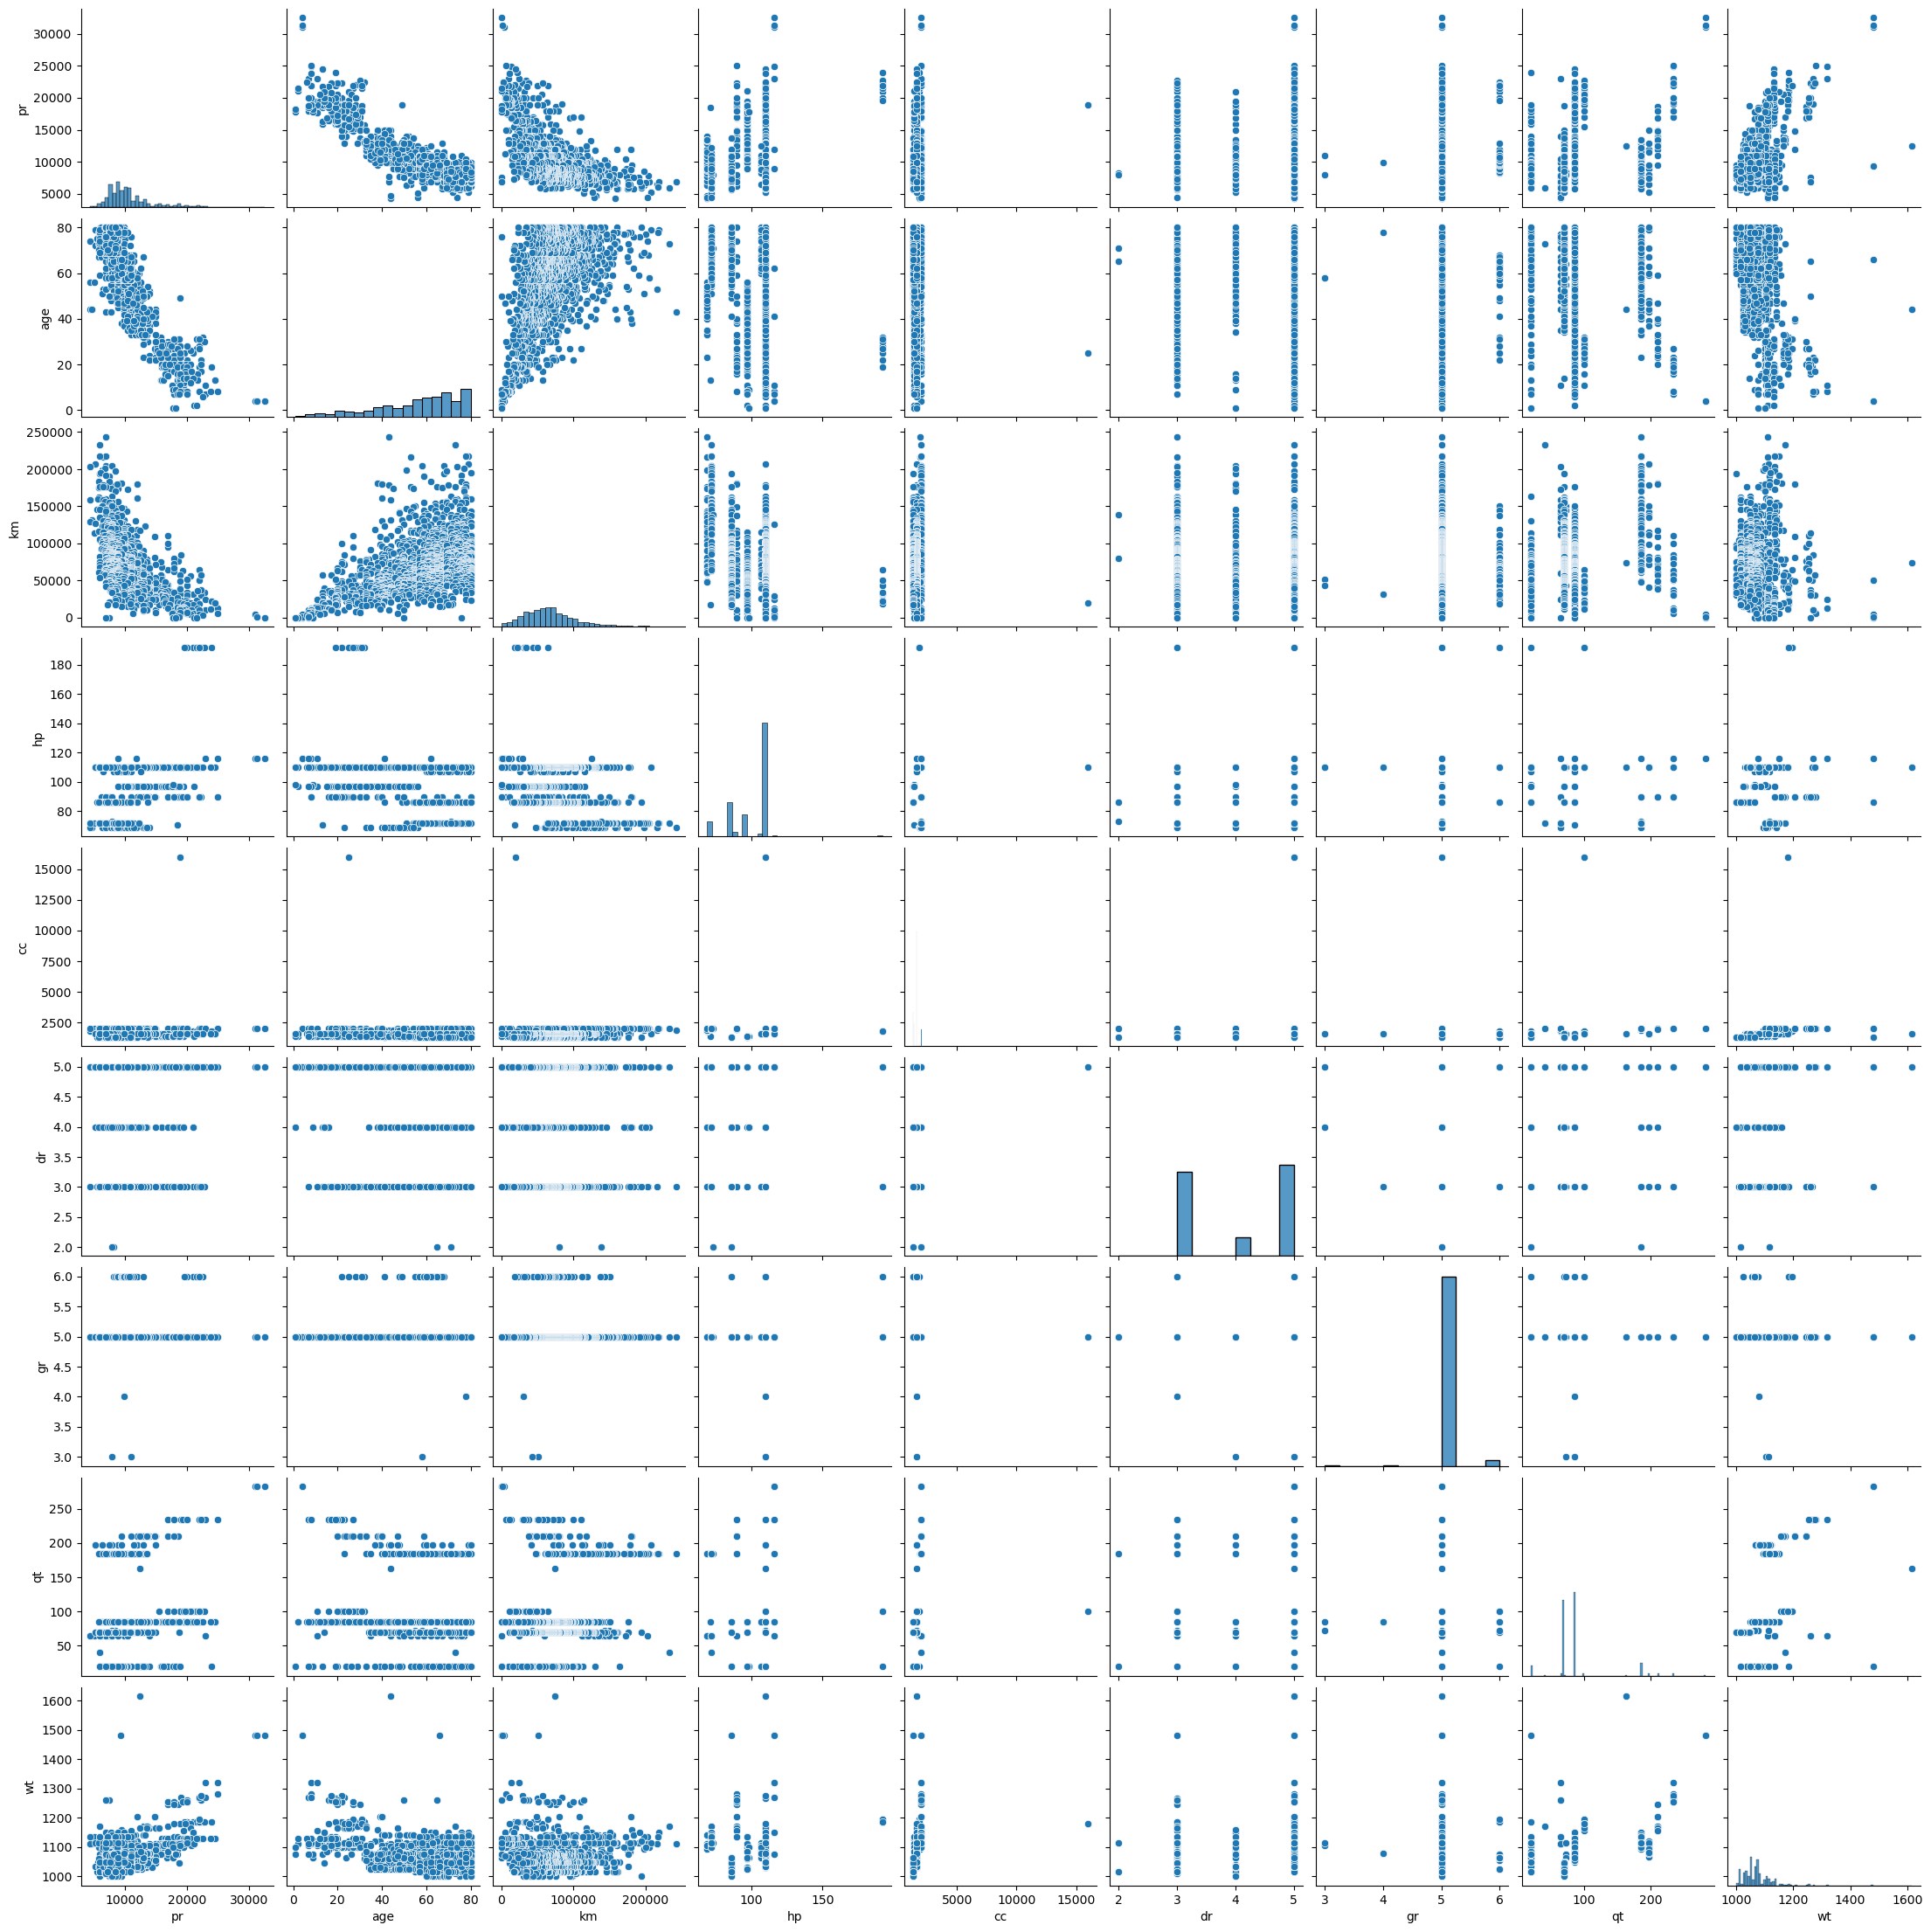

In [21]:
#pair plot
sns.pairplot(df)
plt.show()

**The age and km seems to have negative correlation with price**

## MODEL BUILDING

In [22]:
m=smf.ols('pr~age+km+hp+cc+dr+gr+qt+wt',df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:43:15   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
dr            -0.9202     39.988     -0.023      0.982     -79.362      77.522
gr           597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
m.pvalues > 0.05

Intercept    False
age          False
km           False
hp           False
cc            True
dr            True
gr           False
qt           False
wt           False
dtype: bool

**The cc and dr has p-values > 0.05**

**Resolving Multi collinearity**

## Simple Linear Regression

In [24]:
m_c=smf.ols('pr~cc',df).fit()
m_c.pvalues

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

**The p value of cc is < 0.05 when applied individually on price. Hence there is some of effect of cc on price**

In [25]:
m_d=smf.ols('pr~dr',df).fit()
m_d.pvalues

Intercept    8.976407e-75
dr           2.404166e-12
dtype: float64

**The p value of Doors is < 0.05 when applied individually on price. Hence there is some of effect of Doors on price**

In [26]:
m_cd=smf.ols('pr~cc+dr',df).fit()
m_cd.pvalues

Intercept    1.580945e-35
cc           2.101878e-05
dr           2.109558e-11
dtype: float64

## Calculating VIF values

In [27]:
rsq_age = smf.ols('age~km+hp+cc+dr+gr+qt+wt',data=df).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('km~age+hp+cc+dr+gr+qt+wt',data=df).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('hp~age+km+cc+dr+gr+qt+wt',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 


rsq_cc = smf.ols('cc~age+km+hp+dr+gr+qt+wt',data=df).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_dr = smf.ols('cc~age+km+hp+dr+gr+qt+wt',data=df).fit().rsquared  
vif_dr = 1/(1-rsq_dr) 

rsq_gr = smf.ols('cc~age+km+hp+dr+gr+qt+wt',data=df).fit().rsquared  
vif_gr = 1/(1-rsq_gr) 

rsq_qt = smf.ols('cc~age+km+hp+dr+gr+qt+wt',data=df).fit().rsquared  
vif_qt = 1/(1-rsq_qt) 

rsq_wt = smf.ols('cc~age+km+hp+dr+gr+qt+wt',data=df).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

# Storing vif values in a data frame
d1 = {'Variables':['age','km','hp','cc','dr','gr','qt','wt'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_qt,vif_wt]}
Vif= pd.DataFrame(d1)  
Vif

,Variables,VIF
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,dr,1.163470
5,gr,1.163470
6,qt,1.163470
7,wt,1.163470


## Residual Analysis

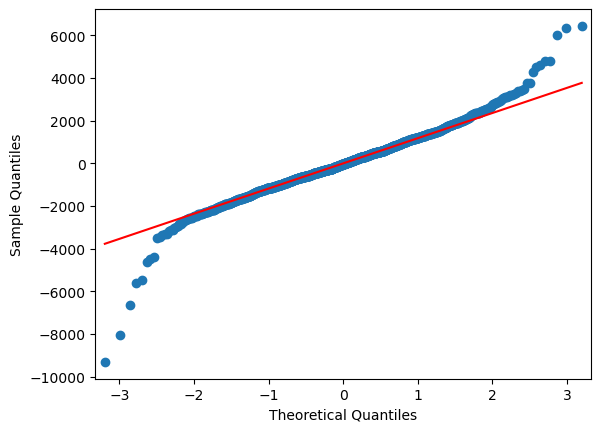

In [28]:
##QQ-Plots
qq=sm.qqplot(m.resid,line='q')
plt.show()

Text(0, 0.5, 'standardized residual values')

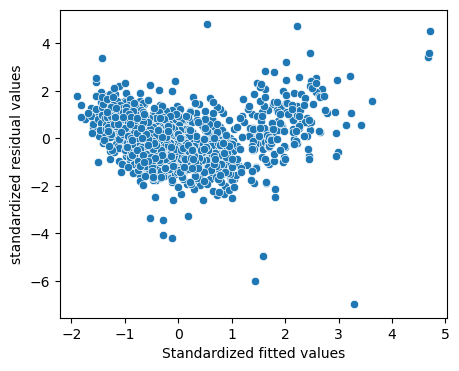

In [29]:
#RESIDUAL PLOT
def standardize(vals):
    e = (vals - vals.mean())/vals.std()
    return e
plt.figure(figsize=(5,4))
sns.scatterplot(x = standardize(m.fittedvalues),y = standardize(m.resid) )
plt.xlabel("Standardized fitted values") # fitted values= predicted values
plt.ylabel("standardized residual values")

eval_env: 1


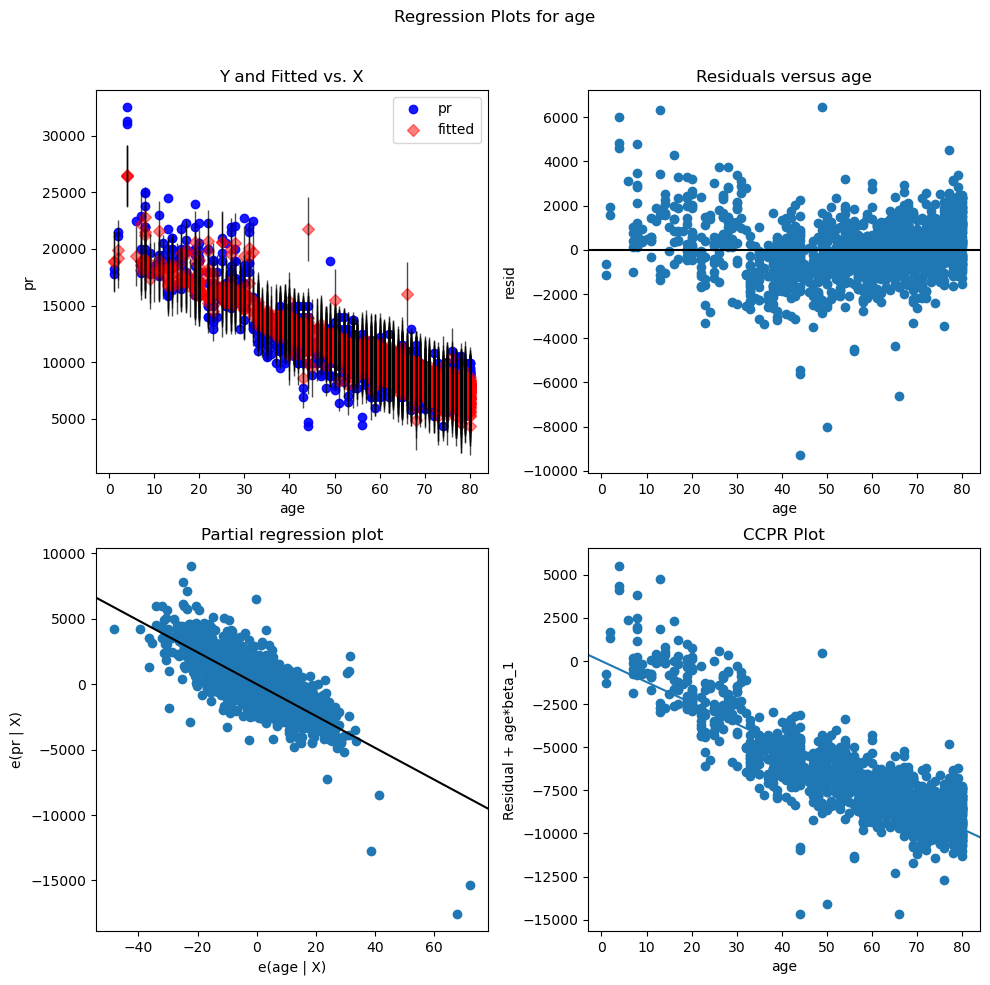

In [30]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(m,'age',fig=fig)
plt.show()

eval_env: 1


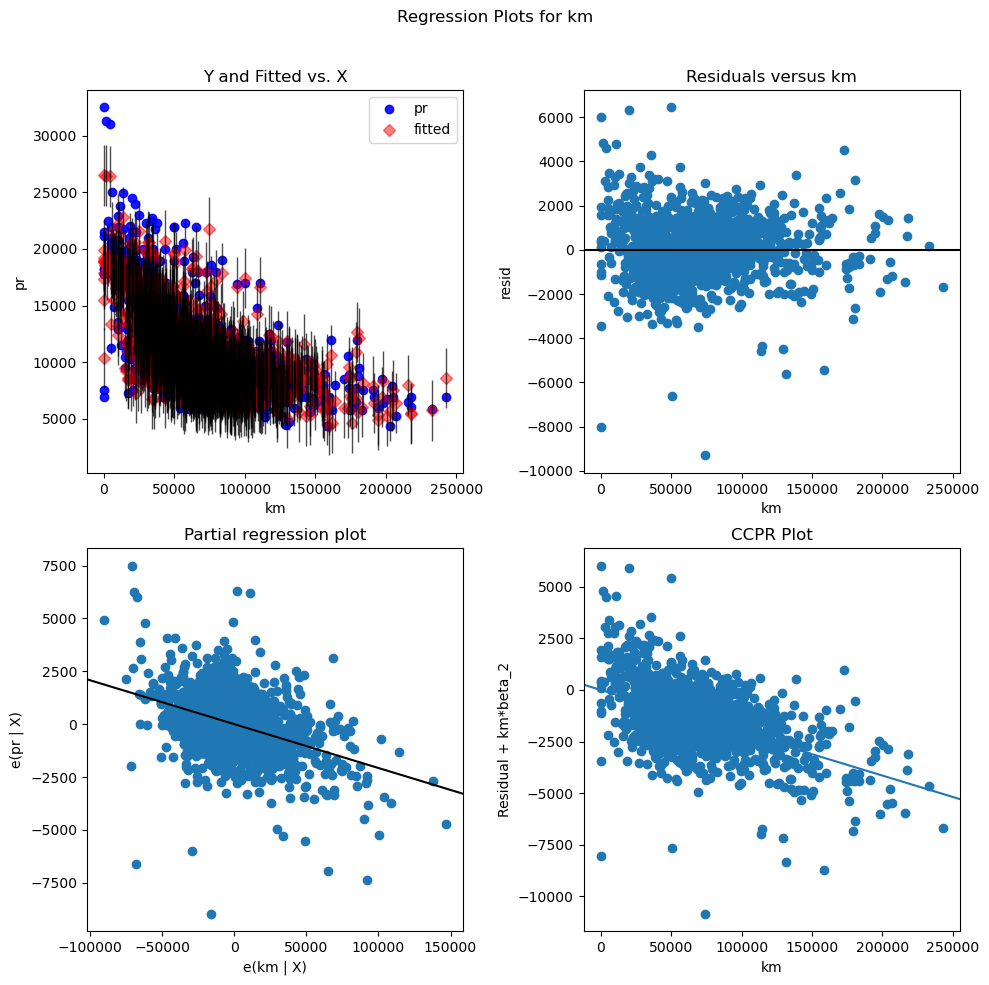

In [31]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(m,'km',fig=fig)
plt.show()

eval_env: 1


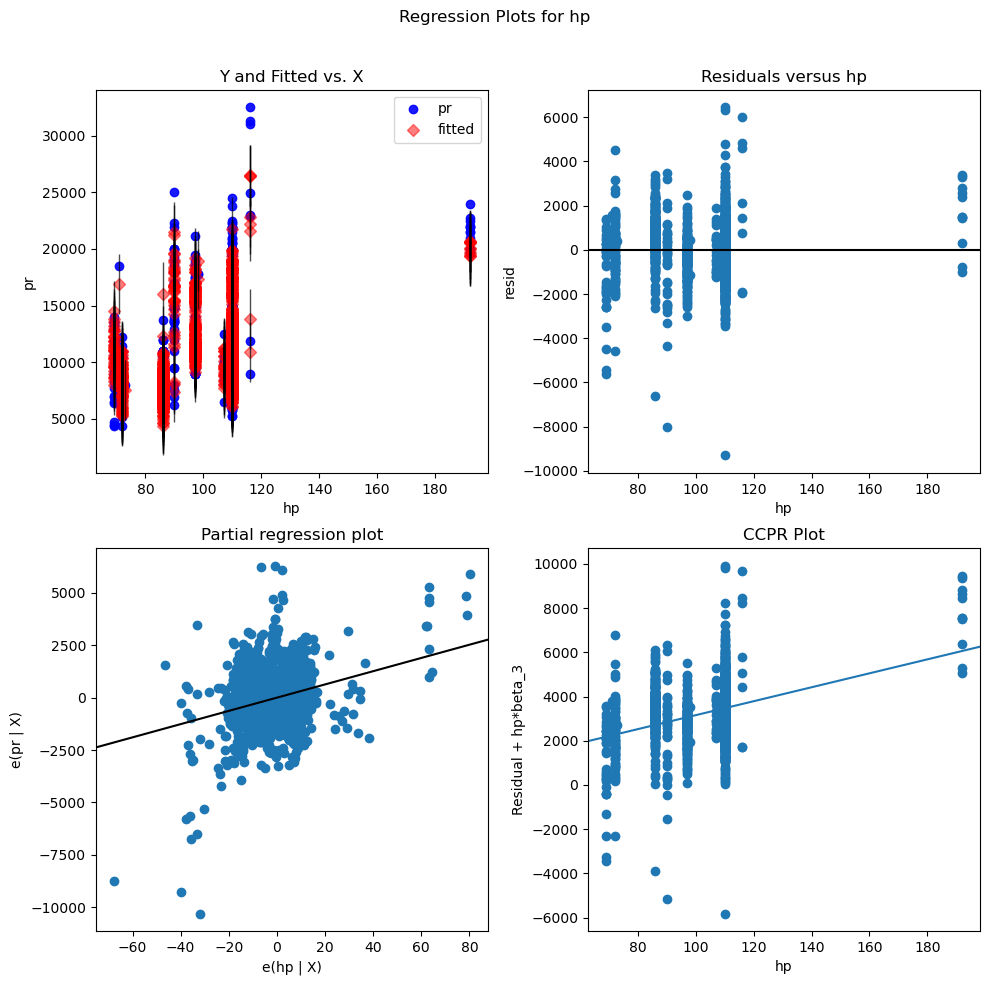

In [32]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(m,'hp',fig=fig)
plt.show()

eval_env: 1


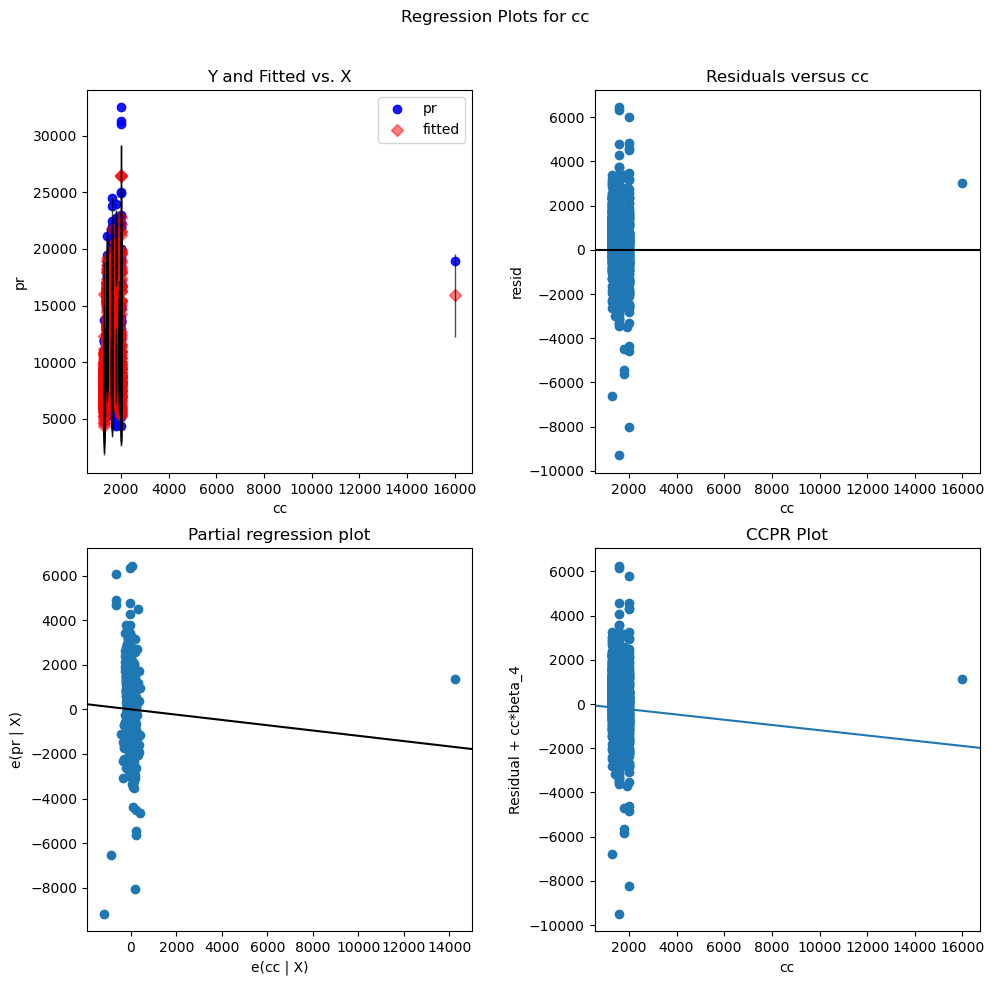

In [33]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(m,'cc',fig=fig)
plt.show()

eval_env: 1


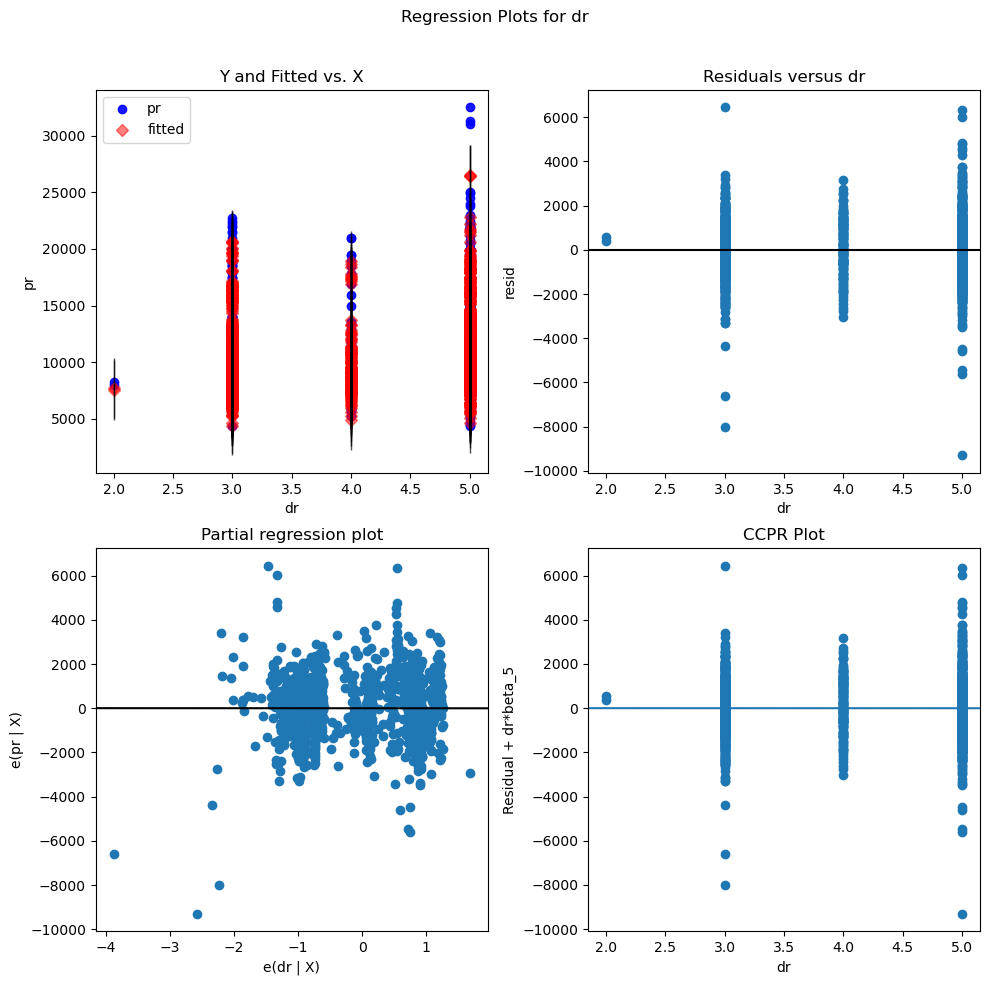

In [34]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(m,'dr',fig=fig)
plt.show()

eval_env: 1


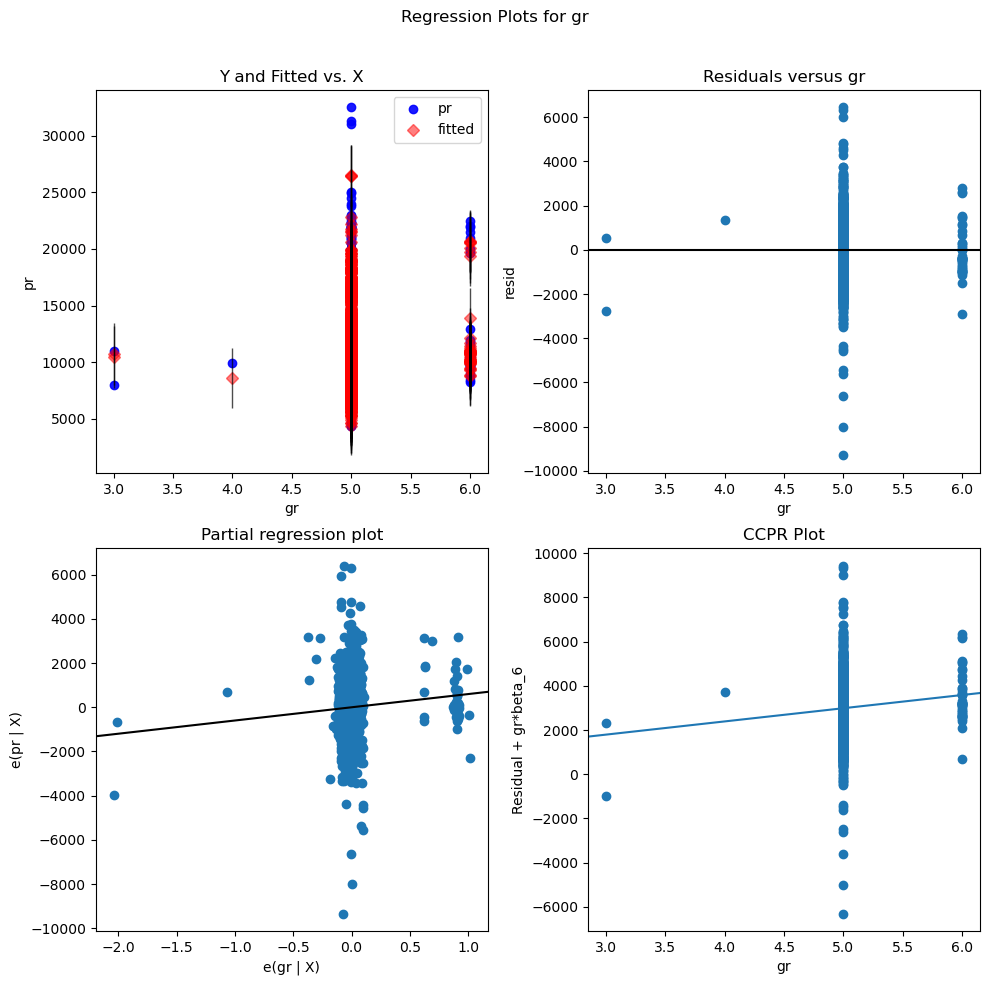

In [35]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(m,'gr',fig=fig)
plt.show()

eval_env: 1


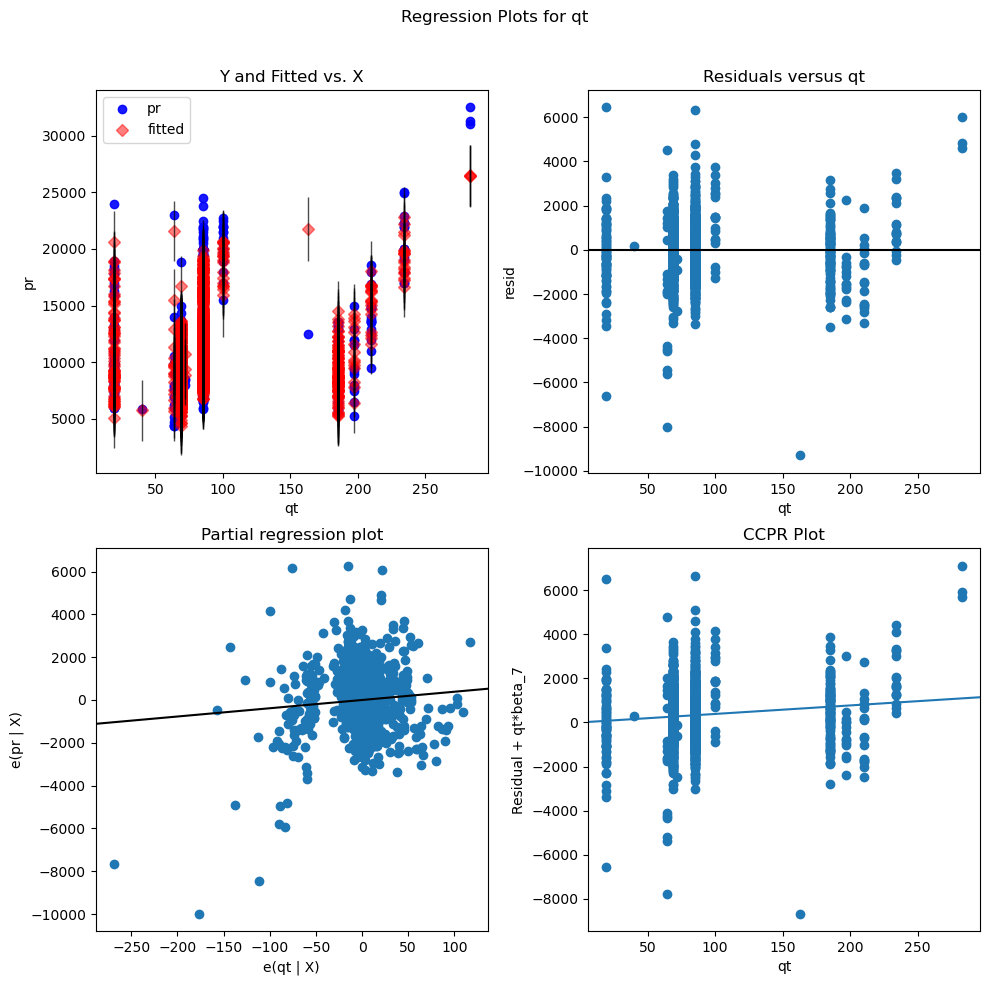

In [36]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(m,'qt',fig=fig)
plt.show()

eval_env: 1


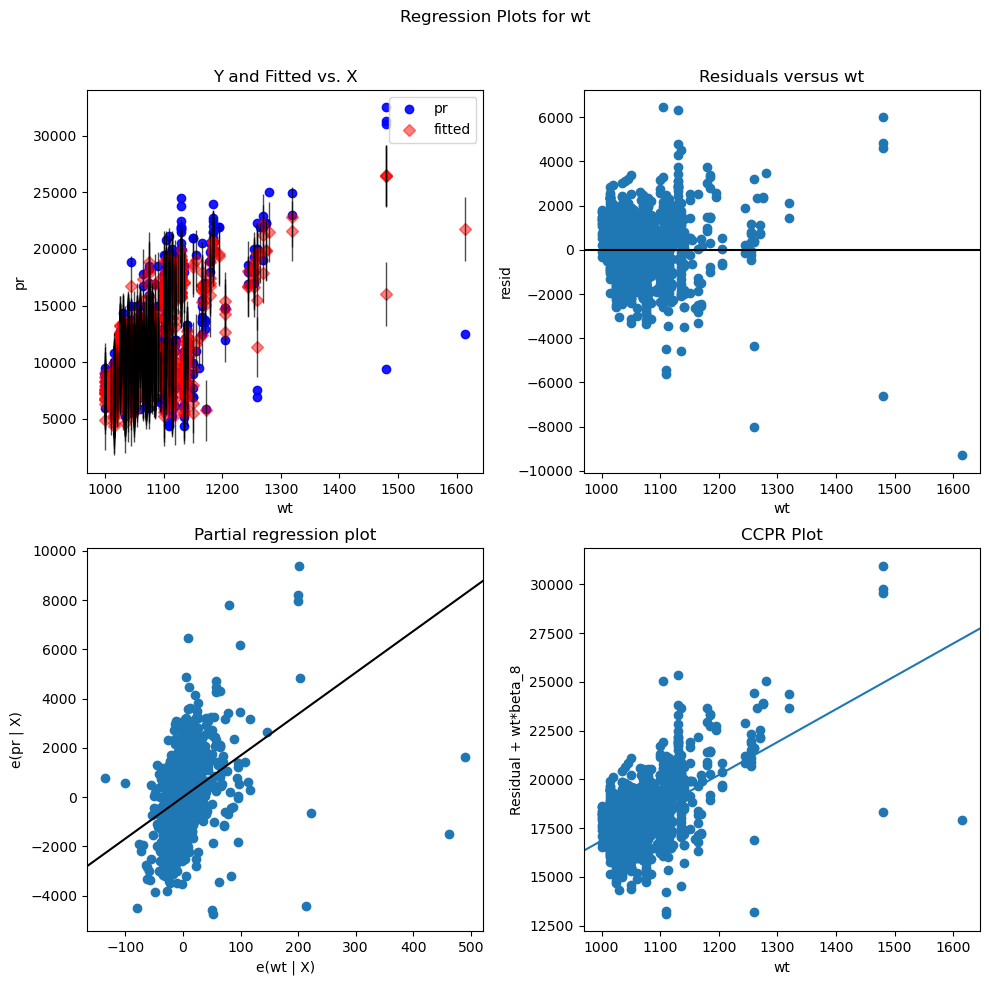

In [37]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(m,'wt',fig=fig)
plt.show()

##  Detecting Outliers

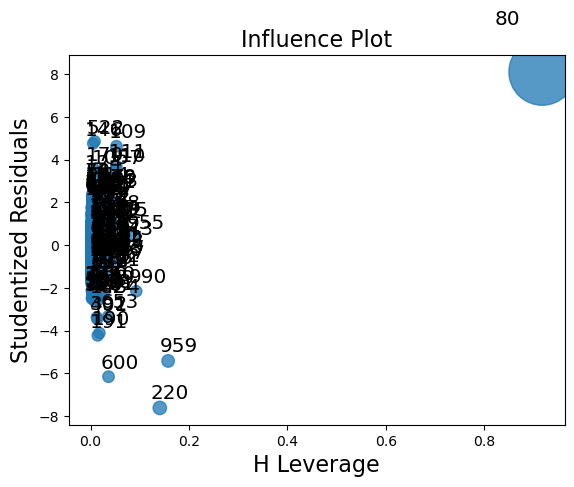

In [38]:
#detecting influencers/outliers
# model=mpg~ wt+hp+sp+vol
influence_plot(m)
plt.show()

In [39]:
df.shape

(1435, 9)

In [40]:
#Calculating to leverage
k = df.shape[1] #no. features
n = df.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [41]:
df1 = df.copy()
df1 = df1.drop(df1.index[80],axis=0).reset_index()
df1

,index,pr,age,km,hp,cc,dr,gr,qt,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [42]:
df1.drop(columns='index')

,pr,age,km,hp,cc,dr,gr,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [43]:
df1.shape

(1434, 10)

In [44]:
#Model Rebuilding
mv=smf.ols('pr~age+km+hp+cc+dr+gr+qt+wt',df1).fit()

In [45]:
mfv = mv.get_influence()
(cv,_)=mfv.cooks_distance
cv=pd.DataFrame(cv)
cv

,0
0,0.006746
1,0.003614
2,0.004902
3,0.001017
4,0.003583
...,...
1429,0.000855
1430,0.002498
1431,0.000004
1432,0.000910


<StemContainer object of 3 artists>

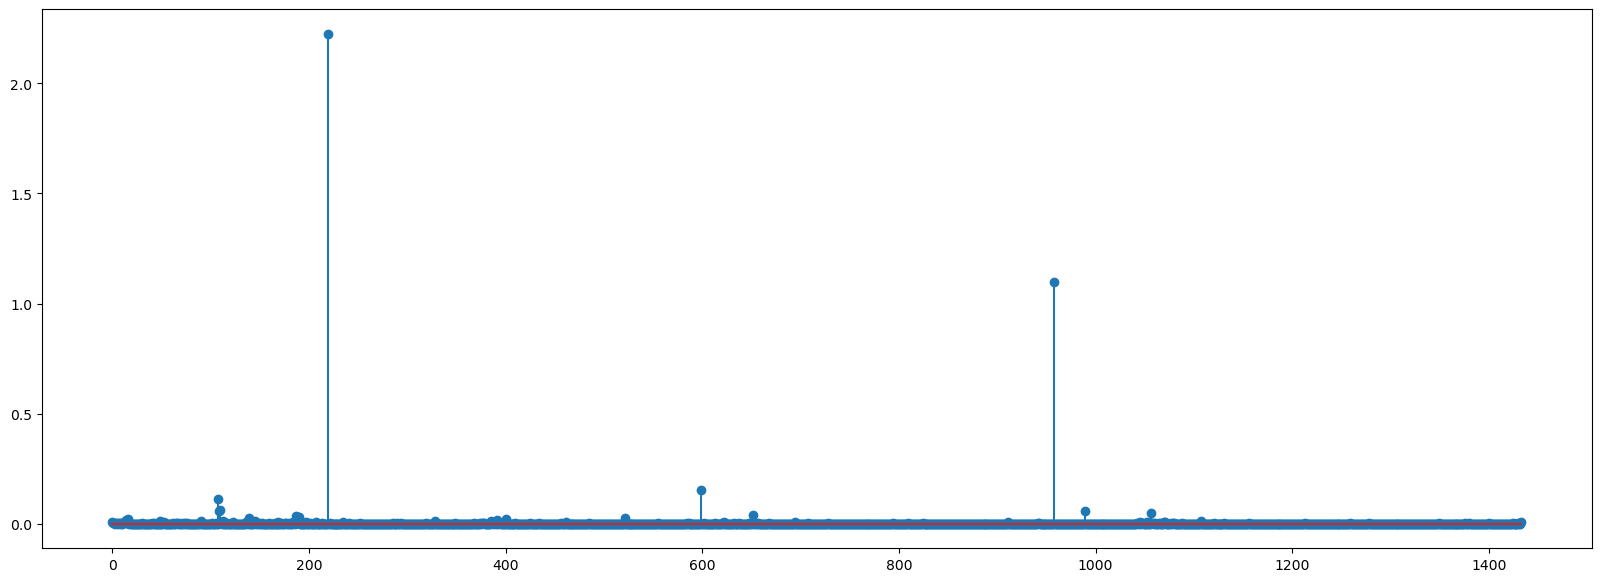

In [46]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv,3))

In [47]:
np.argmax(cv)

219

In [48]:
np.max(cv)

0    2.225351
dtype: float64

In [49]:
df1.drop(df1.index[219],axis=0,inplace=True)
df1 = df1.reset_index()

In [50]:
df1=df1.drop(columns='index')
df1

,level_0,pr,age,km,hp,cc,dr,gr,qt,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [51]:
# since there are to data points that has cook's distance >1
cv.drop(cv.index[219],axis=0,inplace=True)
cv = cv.reset_index()
print(cv)
cv=cv.drop(columns='index')
np.argmax(cv),np.max(cv) 

      index         0
0         0  0.006746
1         1  0.003614
2         2  0.004902
3         3  0.001017
4         4  0.003583
...     ...       ...
1428   1429  0.000855
1429   1430  0.002498
1430   1431  0.000004
1431   1432  0.000910
1432   1433  0.009700

[1433 rows x 2 columns]


(957,
 0    1.098289
 dtype: float64)

In [52]:
df1.drop(df1.index[957],axis=0,inplace=True)
df1 = df1.reset_index()

In [60]:
df1=df1.drop(columns='level_0')
df1

,pr,age,km,hp,cc,dr,gr,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [54]:
df1.shape

(1432, 10)

In [55]:
#Model Rebuilding
mv1=smf.ols('pr~age+km+hp+cc+dr+gr+qt+wt',df1).fit()

In [56]:
mfv1 = mv1.get_influence()
(cv1,_)=mfv1.cooks_distance
cv1=pd.DataFrame(cv1)
cv1

,0
0,0.006824
1,0.003576
2,0.004848
3,0.000871
4,0.003777
...,...
1427,0.001187
1428,0.002700
1429,0.000010
1430,0.001100


<StemContainer object of 3 artists>

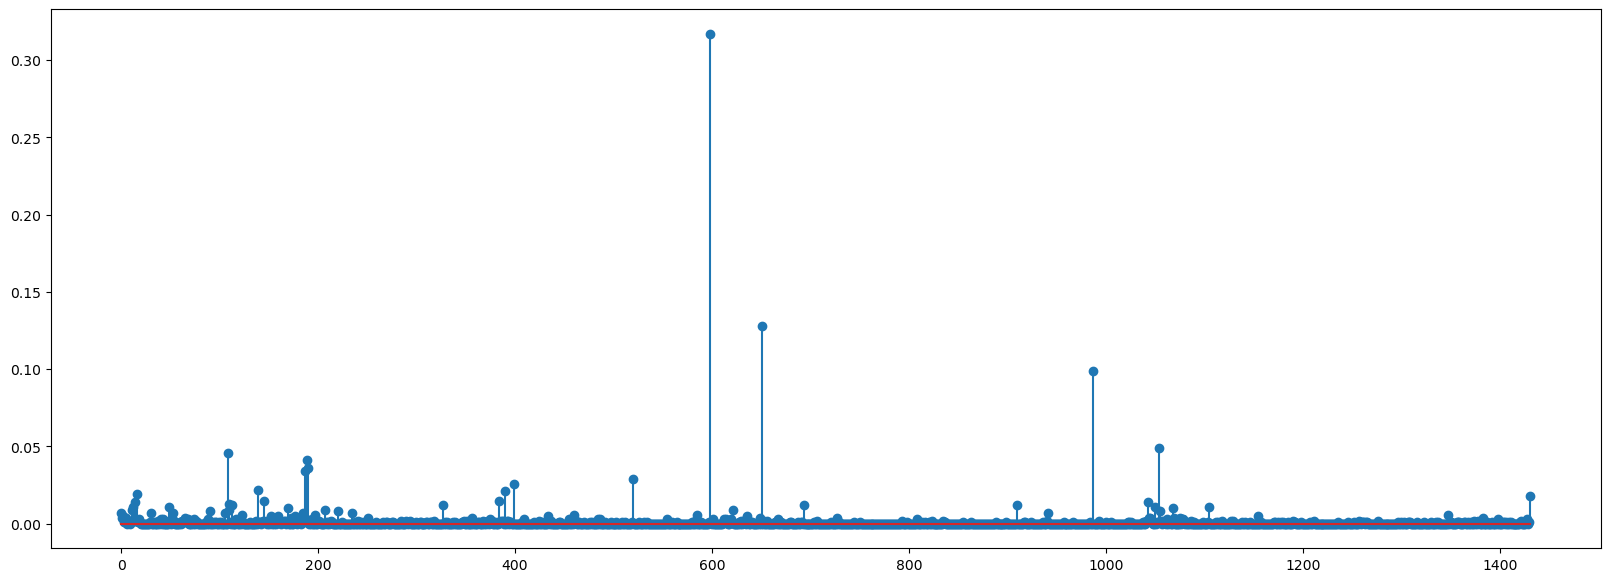

In [57]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv1,3))

In [58]:
(np.argmax(cv1),np.max(cv1))

(598,
 0    0.31689
 dtype: float64)

**Hence there are no more outliers in the model**

In [62]:
#since cv(cooks distance) <1 we can stop the diagnostics

model = smf.ols("pr~age+km+hp+cc+dr+gr+qt+wt",data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:47:24   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
age         -112.0629      2.481    -45.176      0.000    -116.929    -107.197
km            -0.0170      0.001    -14.135      0.000      -0.019      -0.015
hp            36.5587      2.747     13.308      0.000      31.170      41.947
cc            -3.7852      0.303    -12.508      0.000      -4.379      -3.192
dr          -121.9808     37.498     -3.253      0.001    -195.539     -48.423
gr           466.6014    181.031      2.577      0.010     111.485     821.718
qt             5.1754      1.373      3.770      0.000       2.482       7.869
wt            30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## PREDICTING PRICE

In [67]:
pred=model.predict()

In [69]:
df1=df1.rename({'pr':'Price','age':'Age_08_04','km':'KM','hp':'HP','dr':'Doors','gr':'Gears','qt':'Quarterly_Tax','wt':'Weight'},axis=1)
df1['Predicted Price']=pred
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted Price
0,13500,23,46986,90,2000,3,5,210,1165,16326.634426
1,13750,23,72937,90,2000,3,5,210,1165,15886.220972
2,13950,24,41711,90,2000,3,5,210,1165,16304.093367
3,14950,26,48000,90,2000,3,5,210,1165,15973.237208
4,13750,30,38500,90,2000,3,5,210,1170,15839.043084
...,...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025,9114.821644
1428,10845,72,19000,86,1300,3,5,69,1015,8499.169594
1429,8500,71,17016,86,1300,3,5,69,1015,8644.902871
1430,7250,70,16916,86,1300,3,5,69,1015,8758.662855
